In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

### Data cleaning and preparation:


#### Load the dataset into a DataFrame or equivalent data structure.

In [4]:
original_data = pd.read_csv("datasets/Cardiotocographic.csv")
original_data.head(3)

LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  MLTV  \
0  120.0  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   2.4   
1  132.0  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0  10.4   
2  133.0  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0  13.4   

   Width  Tendency  NSP  
0   64.0  0.999926  2.0  
1  130.0  0.000000  1.0  
2  130.0  0.000000  1.0

In [5]:
original_data.shape

(2126, 14)

In [6]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [7]:
original_data.index

RangeIndex(start=0, stop=2126, step=1)

In [8]:
original_data.tail(3)

LB        AC        FM        UC   DL   DS   DP  ASTV  MSTV  \
2123  140.0  0.000980  0.000000  0.006863  0.0  0.0  0.0  79.0   0.4   
2124  140.0  0.000679  0.000000  0.006110  0.0  0.0  0.0  78.0   0.4   
2125  142.0  0.001616 -0.000188  0.008078  0.0  0.0  0.0  74.0   0.4   

           ALTV  MLTV  Width  Tendency       NSP  
2123  20.000000   6.1   67.0       1.0  1.990464  
2124  27.000000   7.0   66.0       1.0  2.000000  
2125  35.857183   5.0   42.0       0.0  1.000000

#### Handle missing values appropriately (e.g., imputation, deletion)

In [10]:
original_data.isnull().sum()   #MISSING VALUES

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [11]:
original_data.dtypes

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

In [12]:
data = original_data.copy()

In [13]:
cols_with_null = ['LB','AC','DS','DP','MLTV','Width','Tendency','NSP']
for col_name in cols_with_null:
    val = data[col_name].mean() # replacing all Nulls with mean because all columns are of numeric type
    # in case of categorical data, nulls can be replaced by mode i.e. val = data[col_name].mode()[0]
    data[col_name] = data[col_name].fillna(val)

In [14]:
data.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [15]:
data.head(3)

LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  MLTV  \
0  120.0  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   2.4   
1  132.0  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0  10.4   
2  133.0  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0  13.4   

   Width  Tendency  NSP  
0   64.0  0.999926  2.0  
1  130.0  0.000000  1.0  
2  130.0  0.000000  1.0

#### all columns have numeric values and the dtype is float64, therefore no need to convert 

#### Detect and treat outliers if necessary.

In [18]:
from scipy.stats import zscore

In [19]:
z_scores = zscore(data.select_dtypes(include=['float64', 'int64']))
z_scores
threshold = 3
outlier_mask = (abs(z_scores) > threshold).any(axis=1)
data_cleaned = data[~outlier_mask]
data_cleaned

LB        AC        FM        UC        DL   DS   DP  ASTV  \
0     120.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  73.0   
1     132.000000  0.006380  0.000000  0.006380  0.003190  0.0  0.0  17.0   
2     133.000000  0.003322  0.000000  0.008306  0.003322  0.0  0.0  16.0   
3     134.000000  0.002561  0.000000  0.007742  0.002561  0.0  0.0  16.0   
4     131.948232  0.006515  0.000000  0.008143  0.000000  0.0  0.0  16.0   
...          ...       ...       ...       ...       ...  ...  ...   ...   
2120  140.000000  0.000000  0.000000  0.004975  0.001244  0.0  0.0  77.0   
2122  140.000000  0.000775  0.000000  0.006979  0.000000  0.0  0.0  78.0   
2123  140.000000  0.000980  0.000000  0.006863  0.000000  0.0  0.0  79.0   
2124  140.000000  0.000679  0.000000  0.006110  0.000000  0.0  0.0  78.0   
2125  142.000000  0.001616 -0.000188  0.008078  0.000000  0.0  0.0  74.0   

      MSTV       ALTV  MLTV  Width  Tendency       NSP  
0      0.5  43.000000   2.4   64.0  0.999926  2.000000  
1      2.1   0.000000  10.4  130.0  0.000000  1.000000  
2      2.1   0.000000  13.4  130.0  0.000000  1.000000  
3      2.4   0.000000  23.0  117.0  1.000000  1.000000  
4      2.4   0.000000  19.9  117.0  1.000000  1.000000  
...    ...        ...   ...    ...       ...       ...  
2120   0.7  17.000000   6.0   31.0  0.000000  1.000000  
2122   0.4  22.000000   7.1   66.0  1.000000  2.000000  
2123   0.4  20.000000   6.1   67.0  1.000000  1.990464  
2124   0.4  27.000000   7.0   66.0  1.000000  2.000000  
2125   0.4  35.857183   5.0   42.0  0.000000  1.000000  

[1869 rows x 14 columns]

### Statistical Summary:

In [21]:
print("Summary Statistics:")
data_cleaned.describe()

Summary Statistics:


LB           AC           FM           UC           DL  \
count  1869.000000  1869.000000  1869.000000  1869.000000  1869.000000   
mean    133.306955     0.003194     0.004240     0.004391     0.001732   
std       9.899631     0.003767     0.013554     0.002904     0.002705   
min     106.000000    -0.000185    -0.005106    -0.000132    -0.000124   
25%     126.000000     0.000000     0.000000     0.002002     0.000000   
50%     133.000000     0.001733     0.000000     0.004556     0.000000   
75%     141.000000     0.005650     0.002358     0.006579     0.003036   
max     160.000000     0.016000     0.189320     0.013861     0.011837   

                 DS           DP         ASTV         MSTV         ALTV  \
count  1.869000e+03  1869.000000  1869.000000  1869.000000  1869.000000   
mean   3.736781e-08     0.000102    46.870868     1.283173     9.193894   
std    6.367633e-07     0.000404    16.834525     0.778099    16.574763   
min   -6.650000e-06    -0.000045    11.799846     0.200000    -1.043619   
25%    0.000000e+00     0.000000    32.000000     0.700000     0.000000   
50%    0.000000e+00     0.000000    48.000000     1.200000     0.000000   
75%    0.000000e+00     0.000000    61.000000     1.700000    11.000000   
max    6.323448e-06     0.002674    87.000000     4.800000    73.000000   

              MLTV        Width     Tendency          NSP  
count  1869.000000  1869.000000  1869.000000  1869.000000  
mean      8.329351    68.930613     0.332264     1.244957  
std       5.226398    37.614026     0.600830     0.528625  
min      -0.200788     7.000000    -1.006614     0.967075  
25%       4.900000    37.000000     0.000000     1.000000  
50%       7.700000    66.000000     0.000000     1.000000  
75%      10.900000    98.000000     1.000000     1.000000  
max      29.500000   180.000000     1.023635     3.034545

#### From the summary; we observe that some min, deviation are high and some of them are low which is unusual. These findings can provide insights into the overall characteristics of data.

### Data Visualization:

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Create histograms or boxplots to visualize the distributions of various numerical variables.

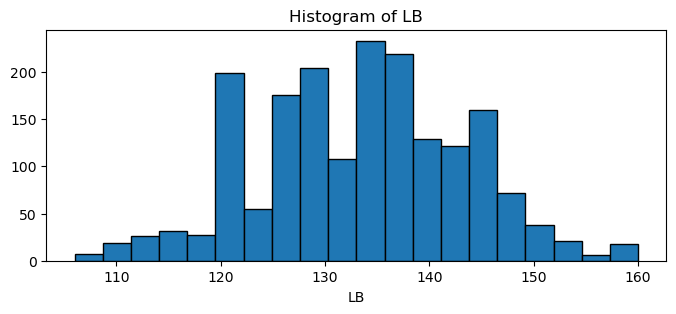

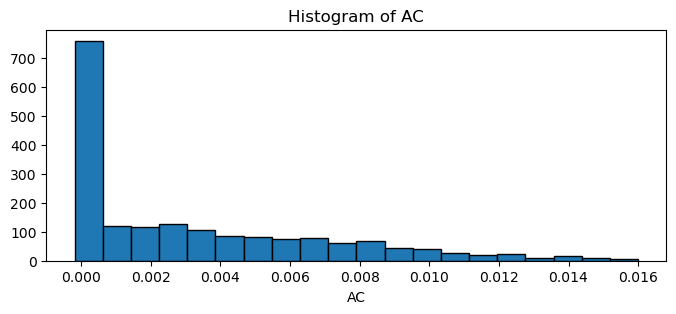

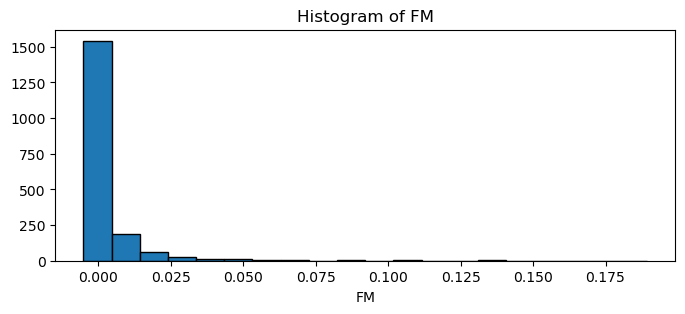

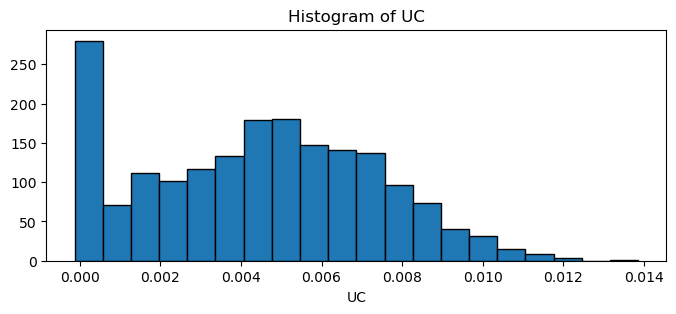

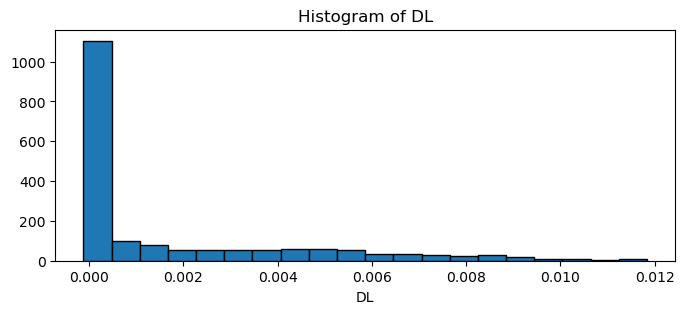

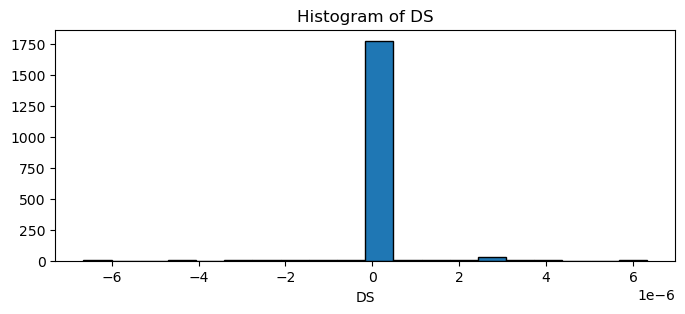

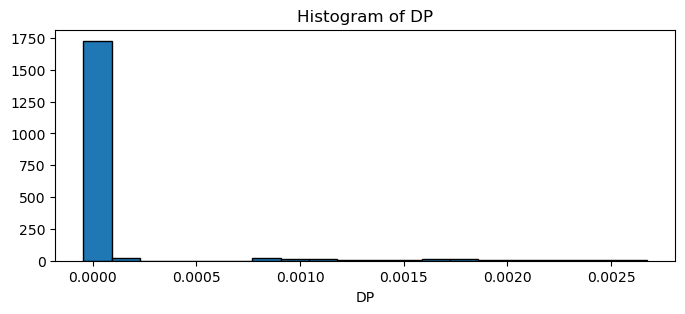

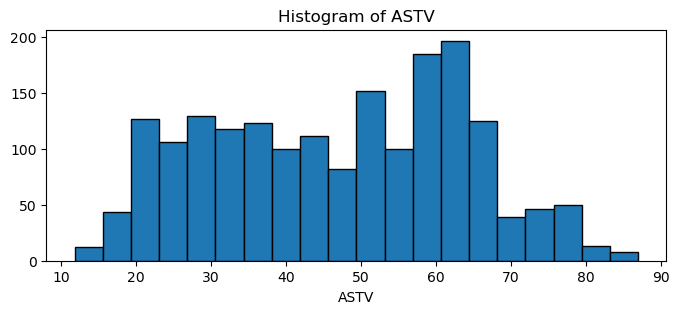

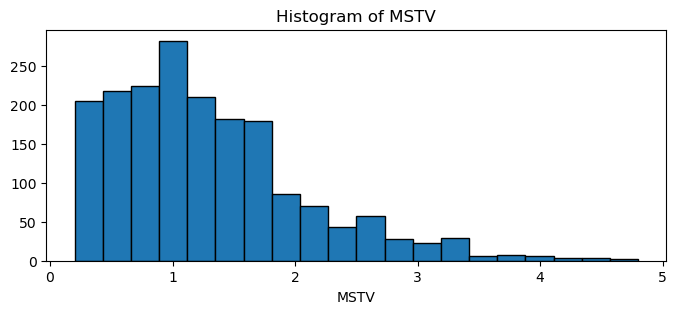

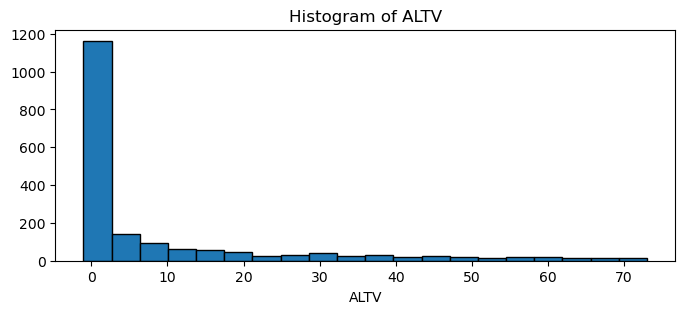

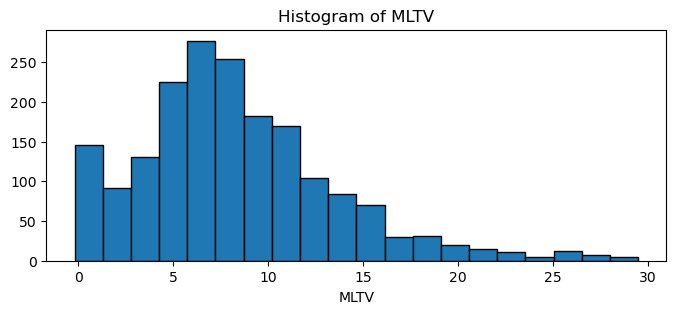

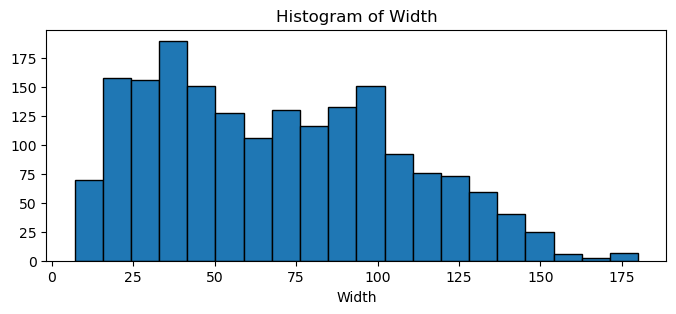

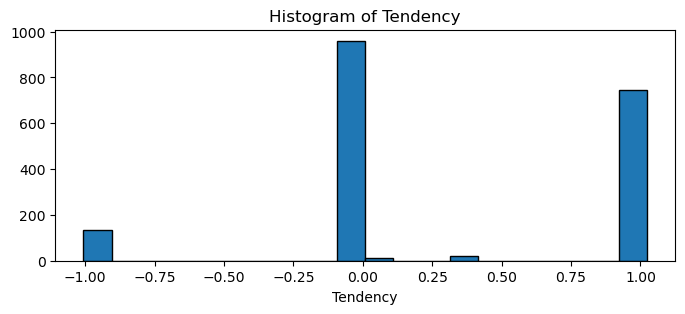

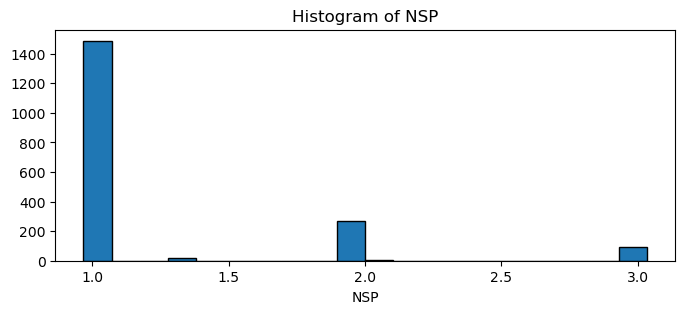

In [190]:
variables = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Tendency', 'NSP']
for var in variables:
    plt.figure(figsize=(8,3))
    plt.hist(data_cleaned[var],edgecolor='black',bins=20 )
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.show()

#### Use bar charts or pie charts to display the frequency of categories for categorical variables.

##### the given dataset does not contain any categorical data

#### Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.

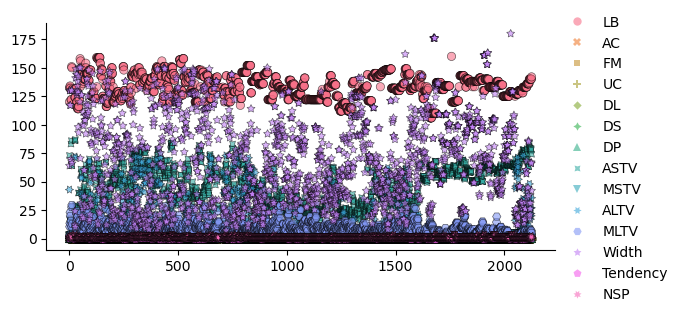

In [194]:
sns.relplot(data_cleaned,
            kind='scatter',
            height=3,
            aspect=2,
            alpha=0.6,
            edgecolor='black'
           )
plt.show()

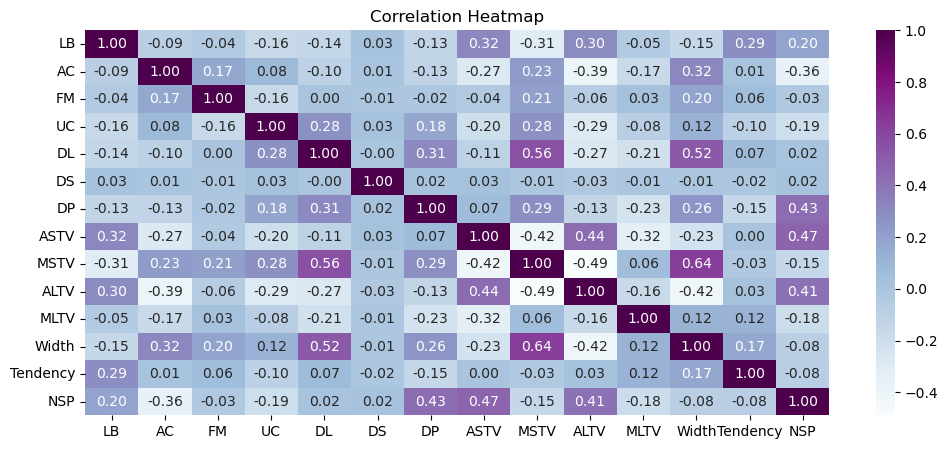

In [198]:
plt.figure(figsize=(12, 5))
correlation_matrix = data_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#### Employ advanced visualization techniques like pair plots, or violin plots for deeper insights.

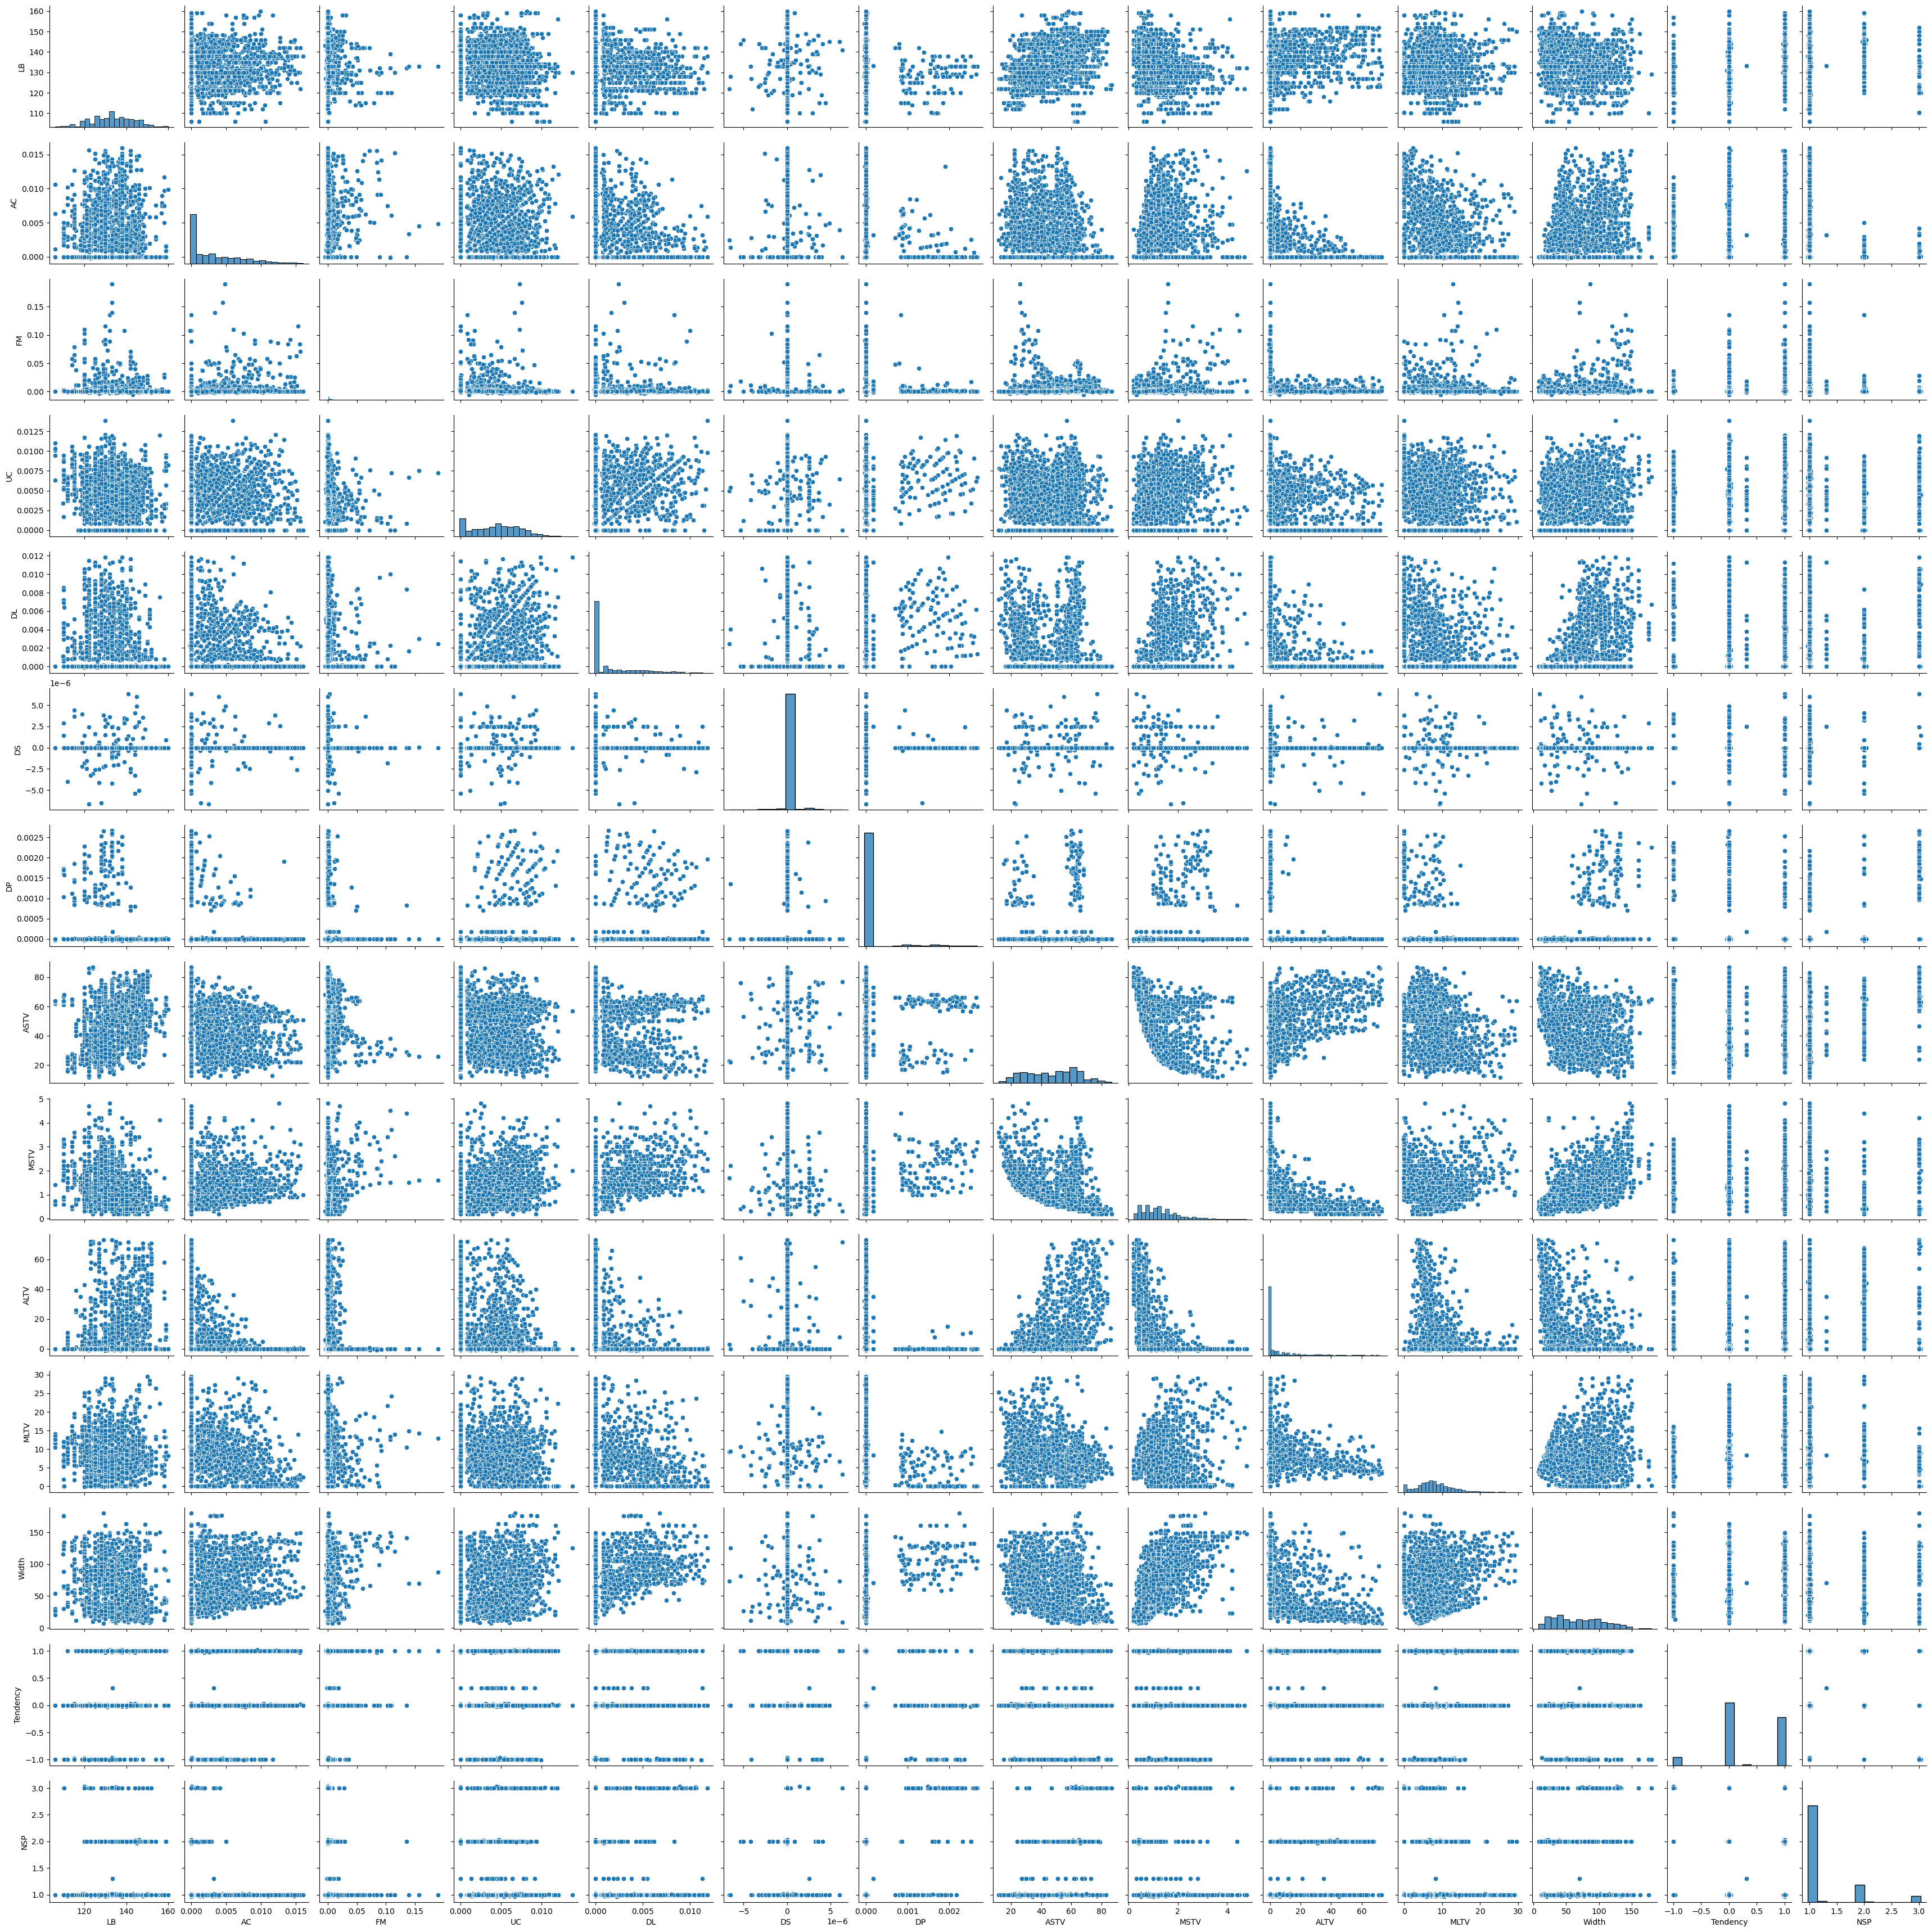

In [162]:
sns.pairplot(data_cleaned, height=2.5)
plt.show()

### Pattern Recognition and Insights:

#### Identify any correlations between variables and discuss their potential implications.

In [166]:
correlation = data_cleaned.corr()
correlation

LB        AC        FM        UC        DL        DS  \
LB        1.000000 -0.086515 -0.042026 -0.160873 -0.142814  0.027850   
AC       -0.086515  1.000000  0.169733  0.080760 -0.097089  0.010686   
FM       -0.042026  0.169733  1.000000 -0.158045  0.002855 -0.006777   
UC       -0.160873  0.080760 -0.158045  1.000000  0.276618  0.030565   
DL       -0.142814 -0.097089  0.002855  0.276618  1.000000 -0.002720   
DS        0.027850  0.010686 -0.006777  0.030565 -0.002720  1.000000   
DP       -0.129591 -0.126544 -0.015265  0.177230  0.310766  0.019256   
ASTV      0.317221 -0.274809 -0.041502 -0.203468 -0.108810  0.028931   
MSTV     -0.310561  0.231367  0.206354  0.279822  0.563550 -0.006152   
ALTV      0.303701 -0.390056 -0.062675 -0.285765 -0.271666 -0.026933   
MLTV     -0.050824 -0.167508  0.033019 -0.079630 -0.212914 -0.009254   
Width    -0.145620  0.315573  0.196064  0.118759  0.517190 -0.011315   
Tendency  0.294301  0.014916  0.057996 -0.096481  0.070314 -0.017551   
NSP       0.195863 -0.355865 -0.033463 -0.192304  0.015705  0.022072   

                DP      ASTV      MSTV      ALTV      MLTV     Width  \
LB       -0.129591  0.317221 -0.310561  0.303701 -0.050824 -0.145620   
AC       -0.126544 -0.274809  0.231367 -0.390056 -0.167508  0.315573   
FM       -0.015265 -0.041502  0.206354 -0.062675  0.033019  0.196064   
UC        0.177230 -0.203468  0.279822 -0.285765 -0.079630  0.118759   
DL        0.310766 -0.108810  0.563550 -0.271666 -0.212914  0.517190   
DS        0.019256  0.028931 -0.006152 -0.026933 -0.009254 -0.011315   
DP        1.000000  0.065640  0.288974 -0.129843 -0.225322  0.257677   
ASTV      0.065640  1.000000 -0.420823  0.436725 -0.321843 -0.225004   
MSTV      0.288974 -0.420823  1.000000 -0.488712  0.061187  0.642640   
ALTV     -0.129843  0.436725 -0.488712  1.000000 -0.164896 -0.418816   
MLTV     -0.225322 -0.321843  0.061187 -0.164896  1.000000  0.115728   
Width     0.257677 -0.225004  0.642640 -0.418816  0.115728  1.000000   
Tendency -0.148654  0.002699 -0.034135  0.032804  0.116399  0.170904   
NSP       0.434783  0.471407 -0.146029  0.414355 -0.180869 -0.083723   

          Tendency       NSP  
LB        0.294301  0.195863  
AC        0.014916 -0.355865  
FM        0.057996 -0.033463  
UC       -0.096481 -0.192304  
DL        0.070314  0.015705  
DS       -0.017551  0.022072  
DP       -0.148654  0.434783  
ASTV      0.002699  0.471407  
MSTV     -0.034135 -0.146029  
ALTV      0.032804  0.414355  
MLTV      0.116399 -0.180869  
Width     0.170904 -0.083723  
Tendency  1.000000 -0.076505  
NSP      -0.076505  1.000000

#### Look for trends or patterns over time if temporal data is available.

##### there is no time series data in given dataset

### Conclusion

After conducting exploratory analysis of the dataset, several key insights have been uncovered:
-There is a some positive correlation between variable A and variable B, suggesting a potential relationship.
-The distribution of variable X appears to be skewed, indicating possible outliers or anomalies.

### consequences

-The identified correlations and patterns suggests efforts in predictive modeling.
-Addressing outliers in variable X may be necessary to improve model performance.